Epoch 0, Loss: 0.6920
Epoch 100, Loss: 0.5522
Epoch 200, Loss: 0.5146
Epoch 300, Loss: 0.4973
Epoch 400, Loss: 0.4873
Epoch 500, Loss: 0.4807
Epoch 600, Loss: 0.4759
Epoch 700, Loss: 0.4723
Epoch 800, Loss: 0.4697
Epoch 900, Loss: 0.4676
Test Accuracy: 0.8250


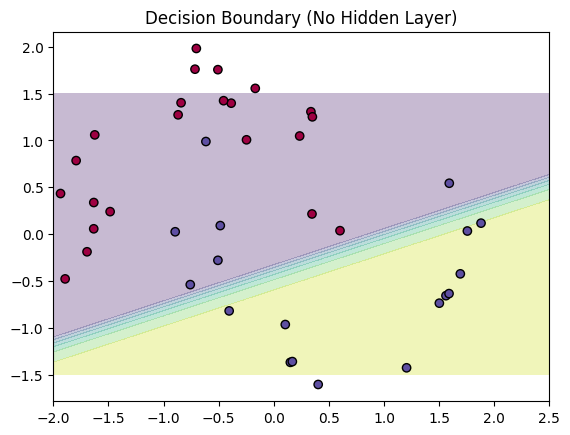

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape labels to be column vector

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
input_size = X_train.shape[1]  # 2 features
output_size = 1  # Single output (binary classification)
W = np.random.randn(input_size, output_size) * 0.01  # Randomly initialize weights
b = np.zeros((1, output_size))  # Bias initialized to zeros

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Activation function
def relu(Z):
    return np.maximum(0, Z)

# Sigmoid activation function for output layer
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Binary Cross-Entropy loss
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z = np.dot(X_train, W) + b  # Linear transformation
    A = relu(Z)  # Apply ReLU activation
    Y_pred = sigmoid(A)  # Output using sigmoid activation

    # Compute loss
    loss = binary_cross_entropy(y_train, Y_pred)

    # Backpropagation
    dA = (Y_pred - y_train) / y_train.shape[0]  # Derivative of loss wrt output
    dZ = dA * (Y_pred * (1 - Y_pred))  # Derivative of sigmoid
    dW = np.dot(X_train.T, dZ)  # Derivative of W
    db = np.sum(dZ, axis=0, keepdims=True)  # Derivative of b

    # Update weights and biases
    W -= learning_rate * dW
    b -= learning_rate * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Predictions on test set
Z_test = np.dot(X_test, W) + b
A_test = relu(Z_test)
Y_pred_test = sigmoid(A_test)
Y_pred_test = (Y_pred_test > 0.5).astype(int)  # Convert to binary predictions

# Accuracy
accuracy = np.mean(Y_pred_test == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1.5, 1.5, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid = scaler.transform(X_grid)
Z_grid = np.dot(X_grid, W) + b
A_grid = relu(Z_grid)
Y_grid = sigmoid(A_grid)
Y_grid = Y_grid.reshape(xx.shape)

plt.contourf(xx, yy, Y_grid, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary (No Hidden Layer)")
plt.show()


Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6927
Epoch 200, Loss: 0.6918
Epoch 300, Loss: 0.6884
Epoch 400, Loss: 0.6744
Epoch 500, Loss: 0.6284
Epoch 600, Loss: 0.5470
Epoch 700, Loss: 0.4772
Epoch 800, Loss: 0.4309
Epoch 900, Loss: 0.4000
Test Accuracy: 0.9000


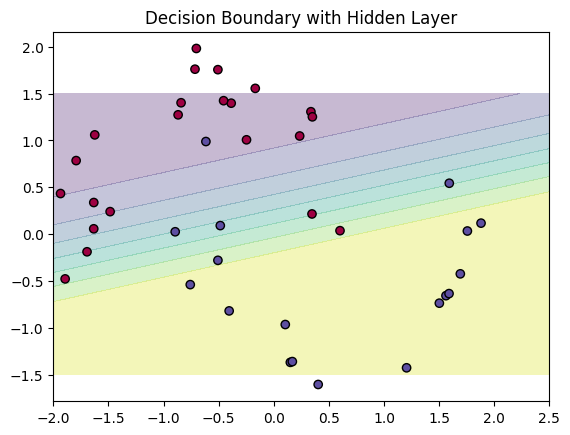

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape labels to be a column vector

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
input_size = X_train.shape[1]  # 2 features
hidden_size = 5  # Hidden layer with 5 neurons
output_size = 1  # Single output (binary classification)

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for hidden layer
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for output layer
b2 = np.zeros((1, output_size))  # Bias for output layer

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Binary Cross-Entropy loss
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1  # Linear transformation for hidden layer
    A1 = relu(Z1)  # ReLU activation for hidden layer
    Z2 = np.dot(A1, W2) + b2  # Linear transformation for output layer
    Y_pred = sigmoid(Z2)  # Sigmoid activation for output layer

    # Compute loss
    loss = binary_cross_entropy(y_train, Y_pred)

    # Backpropagation
    dY_pred = (Y_pred - y_train) / y_train.shape[0]  # Derivative of loss wrt output
    dZ2 = dY_pred * (Y_pred * (1 - Y_pred))  # Derivative of sigmoid
    dW2 = np.dot(A1.T, dZ2)  # Gradient of W2
    db2 = np.sum(dZ2, axis=0, keepdims=True)  # Gradient of b2

    dA1 = np.dot(dZ2, W2.T)  # Backpropagate to hidden layer
    dZ1 = dA1 * relu_derivative(Z1)  # Derivative of ReLU
    dW1 = np.dot(X_train.T, dZ1)  # Gradient of W1
    db1 = np.sum(dZ1, axis=0, keepdims=True)  # Gradient of b1

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Predictions on test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
Y_pred_test = sigmoid(Z2_test)
Y_pred_test = (Y_pred_test > 0.5).astype(int)  # Convert to binary predictions

# Accuracy
accuracy = np.mean(Y_pred_test == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1.5, 1.5, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid = scaler.transform(X_grid)
Z1_grid = np.dot(X_grid, W1) + b1
A1_grid = relu(Z1_grid)
Z2_grid = np.dot(A1_grid, W2) + b2
Y_grid = sigmoid(Z2_grid)
Y_grid = Y_grid.reshape(xx.shape)

plt.contourf(xx, yy, Y_grid, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary with Hidden Layer")
plt.show()
